In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
mouse_path = os.path.join("data", "mouse_drug_data.csv")
clinical_path = os.path.join("data", "clinicaltrial_data.csv")

In [3]:
mouse_drug_df = pd.read_csv(mouse_path)
clinical_trial_df = pd.read_csv(clinical_path)

In [4]:
mouse_clinical_df = pd.merge(clinical_trial_df, mouse_drug_df, left_on= "Mouse ID", right_on= "Mouse ID", how="outer")

In [5]:
mouse_clinical_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


### Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

In [7]:
mean_tumor_volume_df = mouse_clinical_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)": ["mean"]})

In [8]:
mean_tumor_volume_df.columns= ["Average Tumor Volume (mm3)"]

In [9]:
mean_tumor_volume_df.head()

Average Tumor Volume (mm3)
Drug      Timepoint                            
Capomulin 0                           45.000000
          5                           44.266086
          10                          43.084291
          15                          42.064317
          20                          40.716325

In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

In [11]:
sem_tumor_volume = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

In [12]:
sem_tumor_volume_df = pd.DataFrame(sem_tumor_volume)

In [13]:
sem_tumor_volume_df.columns= ["Standard Error of Tumor Volume (mm3)"]

In [14]:
sem_tumor_volume_df.head()

Standard Error of Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                                      0.000000
          5                                      0.448593
          10                                     0.702684
          15                                     0.838617
          20                                     0.909731

In [15]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

In [16]:
mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

In [17]:
mean_tumor_volume_by_drug_df = mean_tumor_volume_df.pivot(index="Timepoint", columns="Drug")["Average Tumor Volume (mm3)"]

In [18]:
mean_tumor_volume_by_drug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [23]:
sem_tumor_volume_df = sem_tumor_volume_df.reset_index()

In [24]:
sem_tumor_volume_by_drug_df = sem_tumor_volume_df.pivot(index="Timepoint", columns="Drug")["Standard Error of Tumor Volume (mm3)"]

In [25]:
sem_tumor_volume_by_drug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [19]:
# Generate the Plot (with Error Bars)
# Save the Figure

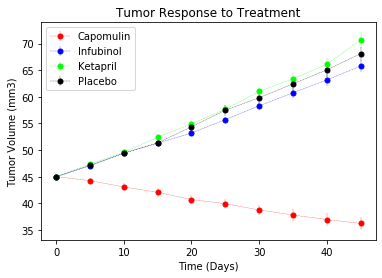

In [52]:
plt.errorbar(mean_tumor_volume_by_drug_df.index, mean_tumor_volume_by_drug_df["Capomulin"], yerr=sem_tumor_volume_by_drug_df["Capomulin"],
            label= "Capomulin", color= "#ff0000", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_tumor_volume_by_drug_df.index, mean_tumor_volume_by_drug_df["Infubinol"], yerr=sem_tumor_volume_by_drug_df["Infubinol"],
            label= "Infubinol", color= "#0000ff", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_tumor_volume_by_drug_df.index, mean_tumor_volume_by_drug_df["Ketapril"], yerr=sem_tumor_volume_by_drug_df["Ketapril"],
            label= "Ketapril", color= "#00ff00", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_tumor_volume_by_drug_df.index, mean_tumor_volume_by_drug_df["Placebo"], yerr=sem_tumor_volume_by_drug_df["Placebo"],
            label= "Placebo", color= "#000000", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc= "upper left")
            
plt.savefig("Treatment.png")
plt.show()

plt.close()